### Projet regression lineaire : 

- groupe : Lauriane, Louise, Espérance & Jérôme 

# Consignes 
- _une partie de récupération et de cleaning de données_

- _une partie découpage de données en deux dataset: un de training et un de testing_

- _une partie d'entrainement d'un modèle de régression linéaire faisant appelle à Scikit learn_

- _une partie d'évaluation du modèle (sur le train et sur le test)_

- _une proposition d'amélioration de ce score_

## 1. Récuperation & cleaning de données

In [1]:
#Librairies 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
#lecture du dataset:
data = pd.read_csv("Fish.csv")

In [3]:
#affichage des cinq premières lignes du dataset: 
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


- Data name : Fish est un jeu de données portant sur les caractères morphologiques de 7 espèces de poissons (3 longueurs, 1 hauteur, 1 largeur) et leurs masses.

In [4]:
#Taille du dataset:
print("Row and columns of Fishdata:")
data.shape

Row and columns of Fishdata:


(159, 7)

- Le jeux de données comprend 159 lignes et 7 colonnes

In [5]:
#information sur le type de données 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Toutes les colonnnes des variables numériques sont de type float64, la variables catégorielle portant sur les espèces ("Sepcies") étant de type object (e.g. str ou string)

In [6]:
#description détaillée du dataset: 
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#Vérifications des valeurs manquantes
data.isna().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

Le jeux de données ne comporte pas de valeurs manquantes

In [8]:
#Vérifions des doublons
data.duplicated().any()

False

Le jeux de données ne comporte pas de lignes dupliquées

## _visualisation_ 

- La fonction pairplot de seaborn permet de visualiser les relations par paire de variables et pour une variable catégorielle (ici l'espèce avec la commande hue ="Species"). 
- Cette fonction nous donne aussi les histogrammes par variable pour chaque espèce.  

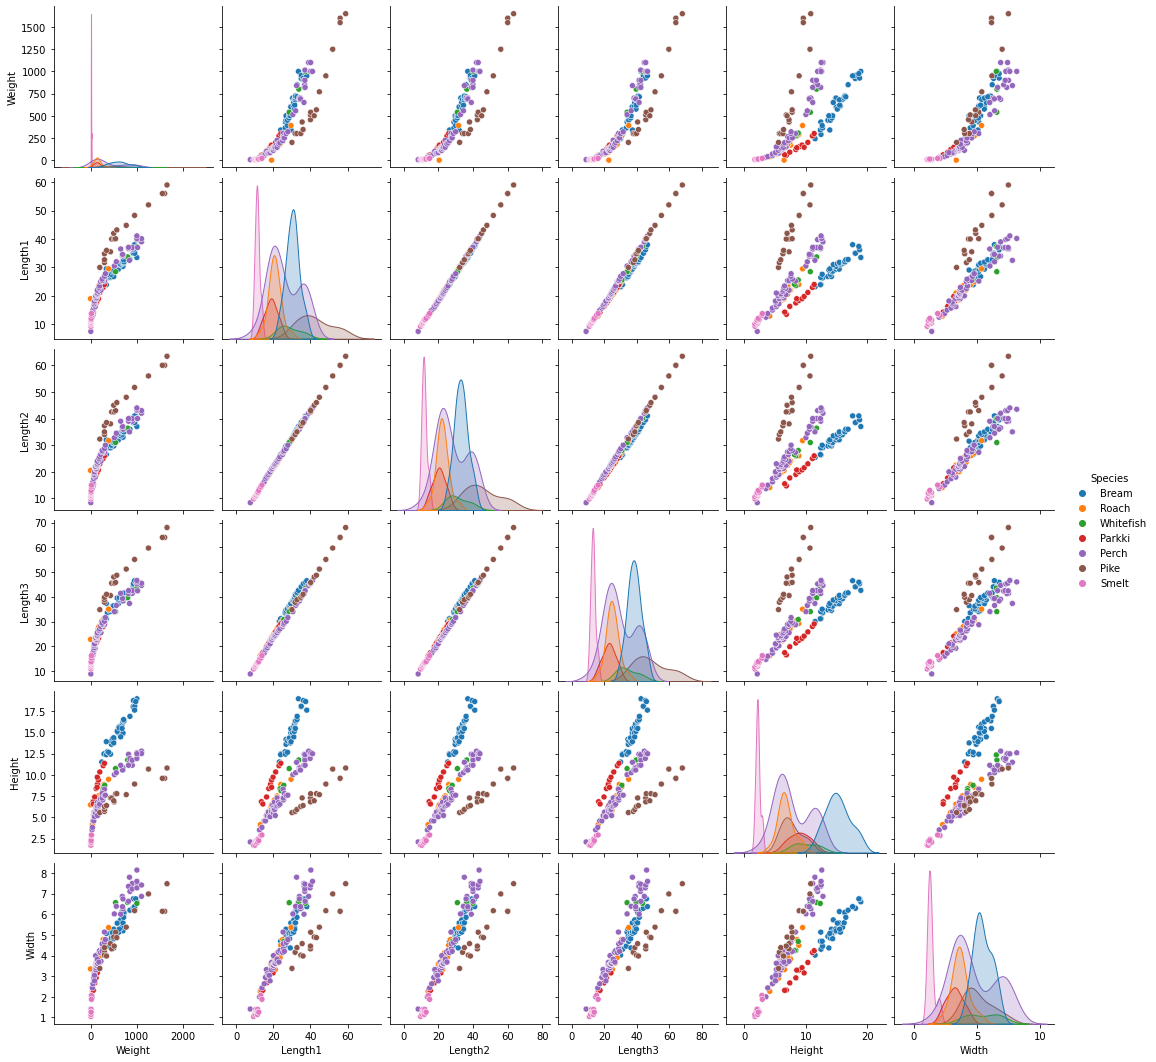

In [9]:
#visualisation des données :
sns.pairplot(data, hue ="Species")
plt.show()

<ul>
<li>On note que la variable cible (Weight) semble corrélée avec toutes les autres variables morphologiques, et que cette relation varie selon l'espèce.</li>
    <li>Néanmoins cette relation ne semble pas être linéaire mais plutot exponentielle.</li>
<li>Aussi toutes les variables morphologiques sont fortement corrélées entre elles ce qui pose un problème quand à leur utilisation commune au sein du modèle

In [10]:
# Nombre de poissons par espèces : 
data["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<ul>
<li>
On note aussi que le nombre de poisson par espèces pour lesquels des mesures sont disponibles est déséquilibré</li>
<li>Ceci pourra poser problème lors d'une éventuelle cross-validation du modèle, un sous échantillonnage sur un nombre faibles d'observations pouvant engendrer un fit biasé voir impossible (e.g espèce absente dans un jeu de données train et présente dans le test).

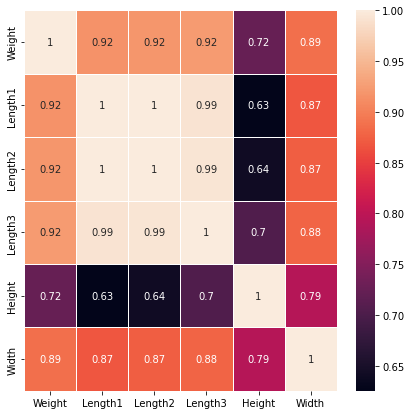

In [11]:
#montrer la correlation entre les variables
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True,linewidth=.5)
plt.show()

<ul>
<li>La heatmap confirme une forte dépendance entre les differentes variables de dimensions des poissons.</li>
<li>Elles sont cependant toutes fortement corrélées avec la masse. Un modèle avec une seule variable dimension + la variable categorielle espèce nous permettrait de prédire au mieux la masse des poissons.</li> </ul>

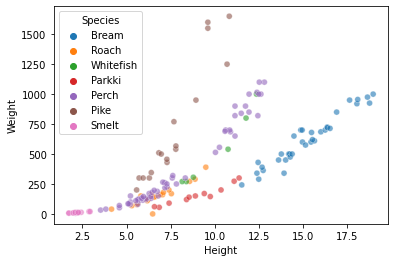

In [12]:
sns.scatterplot(data=data, x="Height", y ="Weight", hue="Species", alpha = 0.6)
plt.show()

<ul>
<li>Le scatterplot ci-dessus illustre la relation entre la masse ('Weight') et une variable morphologique (hauteur = 'Height').</li>
    <li>On note que la relation n'est pas linéaire et varie entre espèces</li></ul>

<ul>
    <li>Toutes choses égales par ailleurs, il peut être anticipé que la masse d'un poisson est proportionnelle à son volume</li>
    <li>Calculons le volume des poissons 

In [13]:
data["Volume"] = data["Length1"]*data["Height"]*data["Width"]

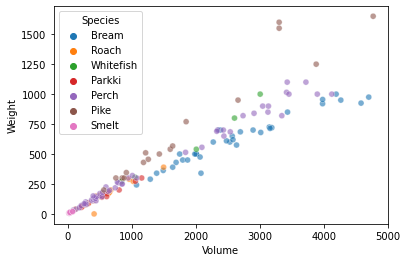

In [14]:
sns.scatterplot(y=data['Weight'], x=data["Volume"], hue= data["Species"], alpha = 0.6)
plt.show()

<ul><li>Il semble que la relation entre la masse et le volume soit en effet linéaire</li>
    <li>Etant donné que les différentes mesures morphologiques sont fortement corrélées entre elles, nous pouvons émettre l'hypothèse qu'elles peuvent être interchangées</li>
    <li>Une seule de ces mesures mises au cube serait alors nécessaire</li></ul> 

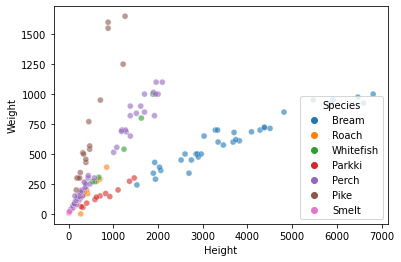

In [15]:
sns.scatterplot(x=data['Height']**3, y=data["Weight"], hue= data["Species"], alpha = 0.6)
plt.show()

Il semble effectivement qu'il y a une très bonne relation linéaire entre la masse et la hauteur mise au cube chez chaque espèces de poisson

## 2.Découpage de données en dataset: training & testing

Pour notre modèle nous choisissons de prédire la masse ('Weight') en fonction de deux features, une numérique tel que la hauteur (Height) et une catégorielle ('Species').  

In [16]:
#extraction de la cible : y 
y =data["Weight"]
#sélection des variables explicatives : 
X = data[["Height","Species"]].copy()
#Mise au cube de la variable Height
Wcube = X['Height'].apply(lambda x: x**3)
X['Height'] = Wcube
#Transformation de la variable categorielle: Species
X = pd.get_dummies(X)
#On ajoute une colonne de valeur constante (i.e. 1) afin d'inclure le calcul de l'ordonnée à l'origine (intercept) 
X["Intercept"]=1
X.head(5)

,Height,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Intercept
0,1528.823808,1,0,0,0,0,0,0,1
1,1943.764992,1,0,0,0,0,0,0,1
2,1896.401907,1,0,0,0,0,0,0,1
3,2062.933417,1,0,0,0,0,0,0,1
4,1926.992424,1,0,0,0,0,0,0,1


In [17]:
#Decoupage de notre data en 80/20 : 80% pour le train & 20% pour le test
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 100)

## 3. Entrainement d'un modèle de regression lineaire :: scikit learn

In [18]:
#choix du modèle: Regresson linéaire 
model = LinearRegression()
#Entrainement du modèle : .fit()
model.fit(X_train, y_train)

LinearRegression()

## 4. Evaluation du modèle (train & test)

In [19]:
#evaluation du modèle :: .score()
print(f"le premier score R2 : {model.score(X_test,y_test)}")

le premier score R2 : 0.5940446261664782


Le modèle explique 59,4% de la variance observée pour la masse des poissons

## 5. Proposition d'amélioration du score 

In [20]:
#Vérification du modèle en faisant une première prédiction
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

- Verifier la condition de la distribution normalisé des erreurs 

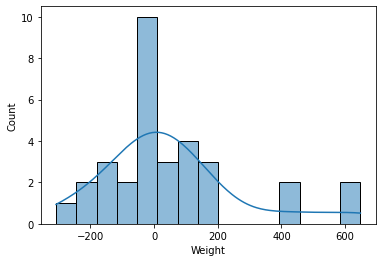

In [21]:
residus = y_predict - y_test
sns.histplot(residus, bins=15, kde=True)
plt.show()

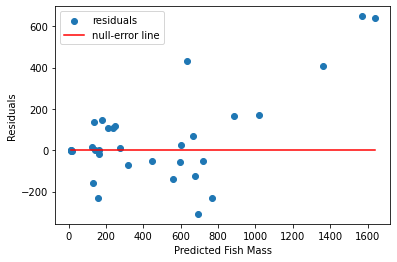

In [22]:
plt.scatter(y_predict, residus, label = 'residuals')
plt.plot([min(y_predict),max(y_predict)], [0,0], c ='r', label = 'null-error line')
plt.xlabel('Predicted Fish Mass')
plt.ylabel('Residuals')
plt.legend()
plt.show()

La répartition des résidus ne semble pas homoscédastique >>> répartition des résidus de manière non-homogène 

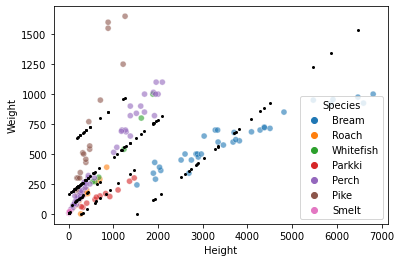

In [23]:
sns.scatterplot(x = data['Height']**3, y = data["Weight"], hue= data["Species"], alpha = 0.6)
plt.scatter(x = X_train['Height'], y = y_predict_train, c = 'black', s = 4)
plt.show()

Les droites prédites pour chaque espèces ont la même pente alors que les pentes diffèrent entre espèces sur les données observées 

- Dans l'ensemble, la distribution des residus ne suit pas une loi normale donc les postulats de la régression linéaire ne sont pas pleinement respectés.
- La raison la plus probable est qu'il n'y pas d'ajustement de pente entre espèces comme nous venons de le voir
- Donc pour améliorer notre modèle, nous proposons d'autoriser différentes pentes par espèces à être ajustées

Autorisons la pente d'être ajustée au sein du modèle pour chaque espèce de poisson. Pour cela il nous faut rajouter 7 colonnes similaires à celles obtenues avec get_dummies sur les espèces, à la différence qu'elles ne contiendront pas des constantes mais la variable Height (au cube). 

In [24]:
list_species = ['Species_Bream', 'Species_Parkki', 'Species_Perch',
       'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']

for species in list_species:
    X[f'{species}_slope'] = X[species] * X['Height']

In [25]:
X.head(5)

,Height,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Intercept,Species_Bream_slope,Species_Parkki_slope,Species_Perch_slope,Species_Pike_slope,Species_Roach_slope,Species_Smelt_slope,Species_Whitefish_slope
0,1528.823808,1,0,0,0,0,0,0,1,1528.823808,0.0,0.0,0.0,0.0,0.0,0.0
1,1943.764992,1,0,0,0,0,0,0,1,1943.764992,0.0,0.0,0.0,0.0,0.0,0.0
2,1896.401907,1,0,0,0,0,0,0,1,1896.401907,0.0,0.0,0.0,0.0,0.0,0.0
3,2062.933417,1,0,0,0,0,0,0,1,2062.933417,0.0,0.0,0.0,0.0,0.0,0.0
4,1926.992424,1,0,0,0,0,0,0,1,1926.992424,0.0,0.0,0.0,0.0,0.0,0.0


Ré-itérons le même processus que précédemment

In [26]:
#Decoupage de notre data en 80/20 : 80% pour le train & 20% pour le test
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 100)

In [27]:
#choix du modèle: Regression linéaire 
model = LinearRegression()
#Entrainement du modèle : .fit()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
#evaluation du modèle: .score()
print(f"le nouveau score R2 est de : {model.score(X_test,y_test)}")

le nouveau score R2 est de : 0.9735149642442005


Le modèle explique maintenant 97,4% de la variance observée pour la masse des poissons

In [29]:
#Vérification du modèle en faisant une première prédiction
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

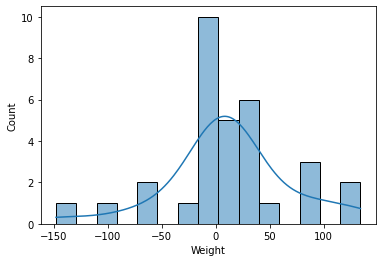

In [30]:
residus = y_predict - y_test
sns.histplot(residus, bins=15, kde=True)
plt.show()

La distribution des résidus ne semble pas être réellement amélioré même si elle s'apparente à une loi normale 

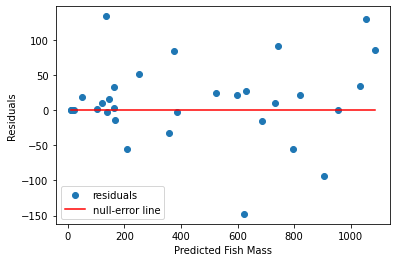

In [31]:
plt.scatter(y_predict, residus, label = 'residuals')
plt.plot([min(y_predict),max(y_predict)], [0,0], c ='r', label = 'null-error line')
plt.xlabel('Predicted Fish Mass')
plt.ylabel('Residuals')
plt.legend()
plt.show()

La répartition des résidus semble maintenant homoscédastique 

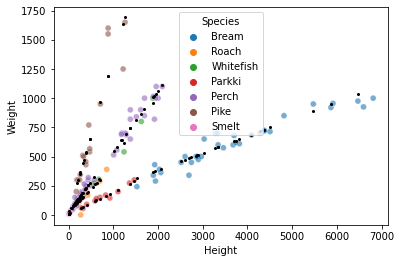

In [32]:
sns.scatterplot(x = data['Height']**3, y = data["Weight"], hue= data["Species"], alpha = 0.6)
plt.scatter(x = X_train['Height'], y = y_predict_train, c = 'black', s = 4)
plt.show()

Les droites prédites ont maintenant des pentes et intercepts différentes par espèces

Comparons les valeurs observées aux valeurs prédites sur le jeu de données test

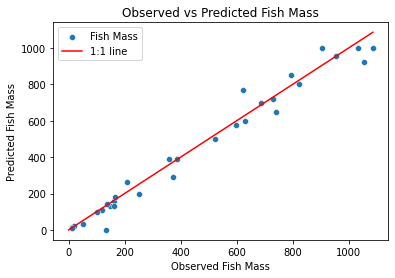

In [33]:
sns.scatterplot(x = y_predict, y = y_test, label = 'Fish Mass')
plt.plot([0,max(y_predict)],[0,max(y_predict)], c = 'r', label = '1:1 line')
plt.title('Observed vs Predicted Fish Mass')
plt.xlabel('Observed Fish Mass')
plt.ylabel('Predicted Fish Mass')
plt.legend()
plt.show()

On observe une bonne répartition des points (Observed vs Predicted sur les jeu de données test) le long de la ligne 1:1 ce qui confirme la capacité prédictive du modèle. 